In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
file_path = "C:\\Users\\admin\\Desktop\\credit_card_churn.csv"

In [17]:
df = pd.read_csv(file_path)

In [65]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175


In [42]:
#Deleting last two colums , ['CLIENTNUM']

columns_to_drop = df.columns[-2:]
df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns=['CLIENTNUM'] , inplace=True)

##### Managing Unknowns
#Education_Level_Unknown, Marital_Status_Unknown , Income_Category_Unknown , 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [72]:
non_numerical_columns_df =df.select_dtypes(include=['object'])
non_numerical_columns_df.info()
numerical_columns =df.select_dtypes(include=['number'])
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  10127 non-null  object
 3   Marital_Status   10127 non-null  object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int6

In [52]:
numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [62]:
df_encoded = pd.get_dummies(df, columns= non_numerical_columns, drop_first = True ).astype(int)

##### REMINDER! for feature sellection

#### 1. Cramér's V Statistic
Cramér's V is a measure of association between two categorical variables.
It is based on the chi-squared statistic and can be used to assess the strength of association.

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

Example DataFrame
data = {
    "Color": ["Red", "Blue", "Green", "Red", "Green", "Blue"],
    "Shape": ["Circle", "Square", "Circle", "Triangle", "Square", "Circle"]
}




df = pd.DataFrame(data)




Calculate Cramer's V for each pair of categorical variables
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            print(f"Cramer's V between {col1} and {col2}: {cramers_v(df[col1], df[col2])}")


## Feature Selection

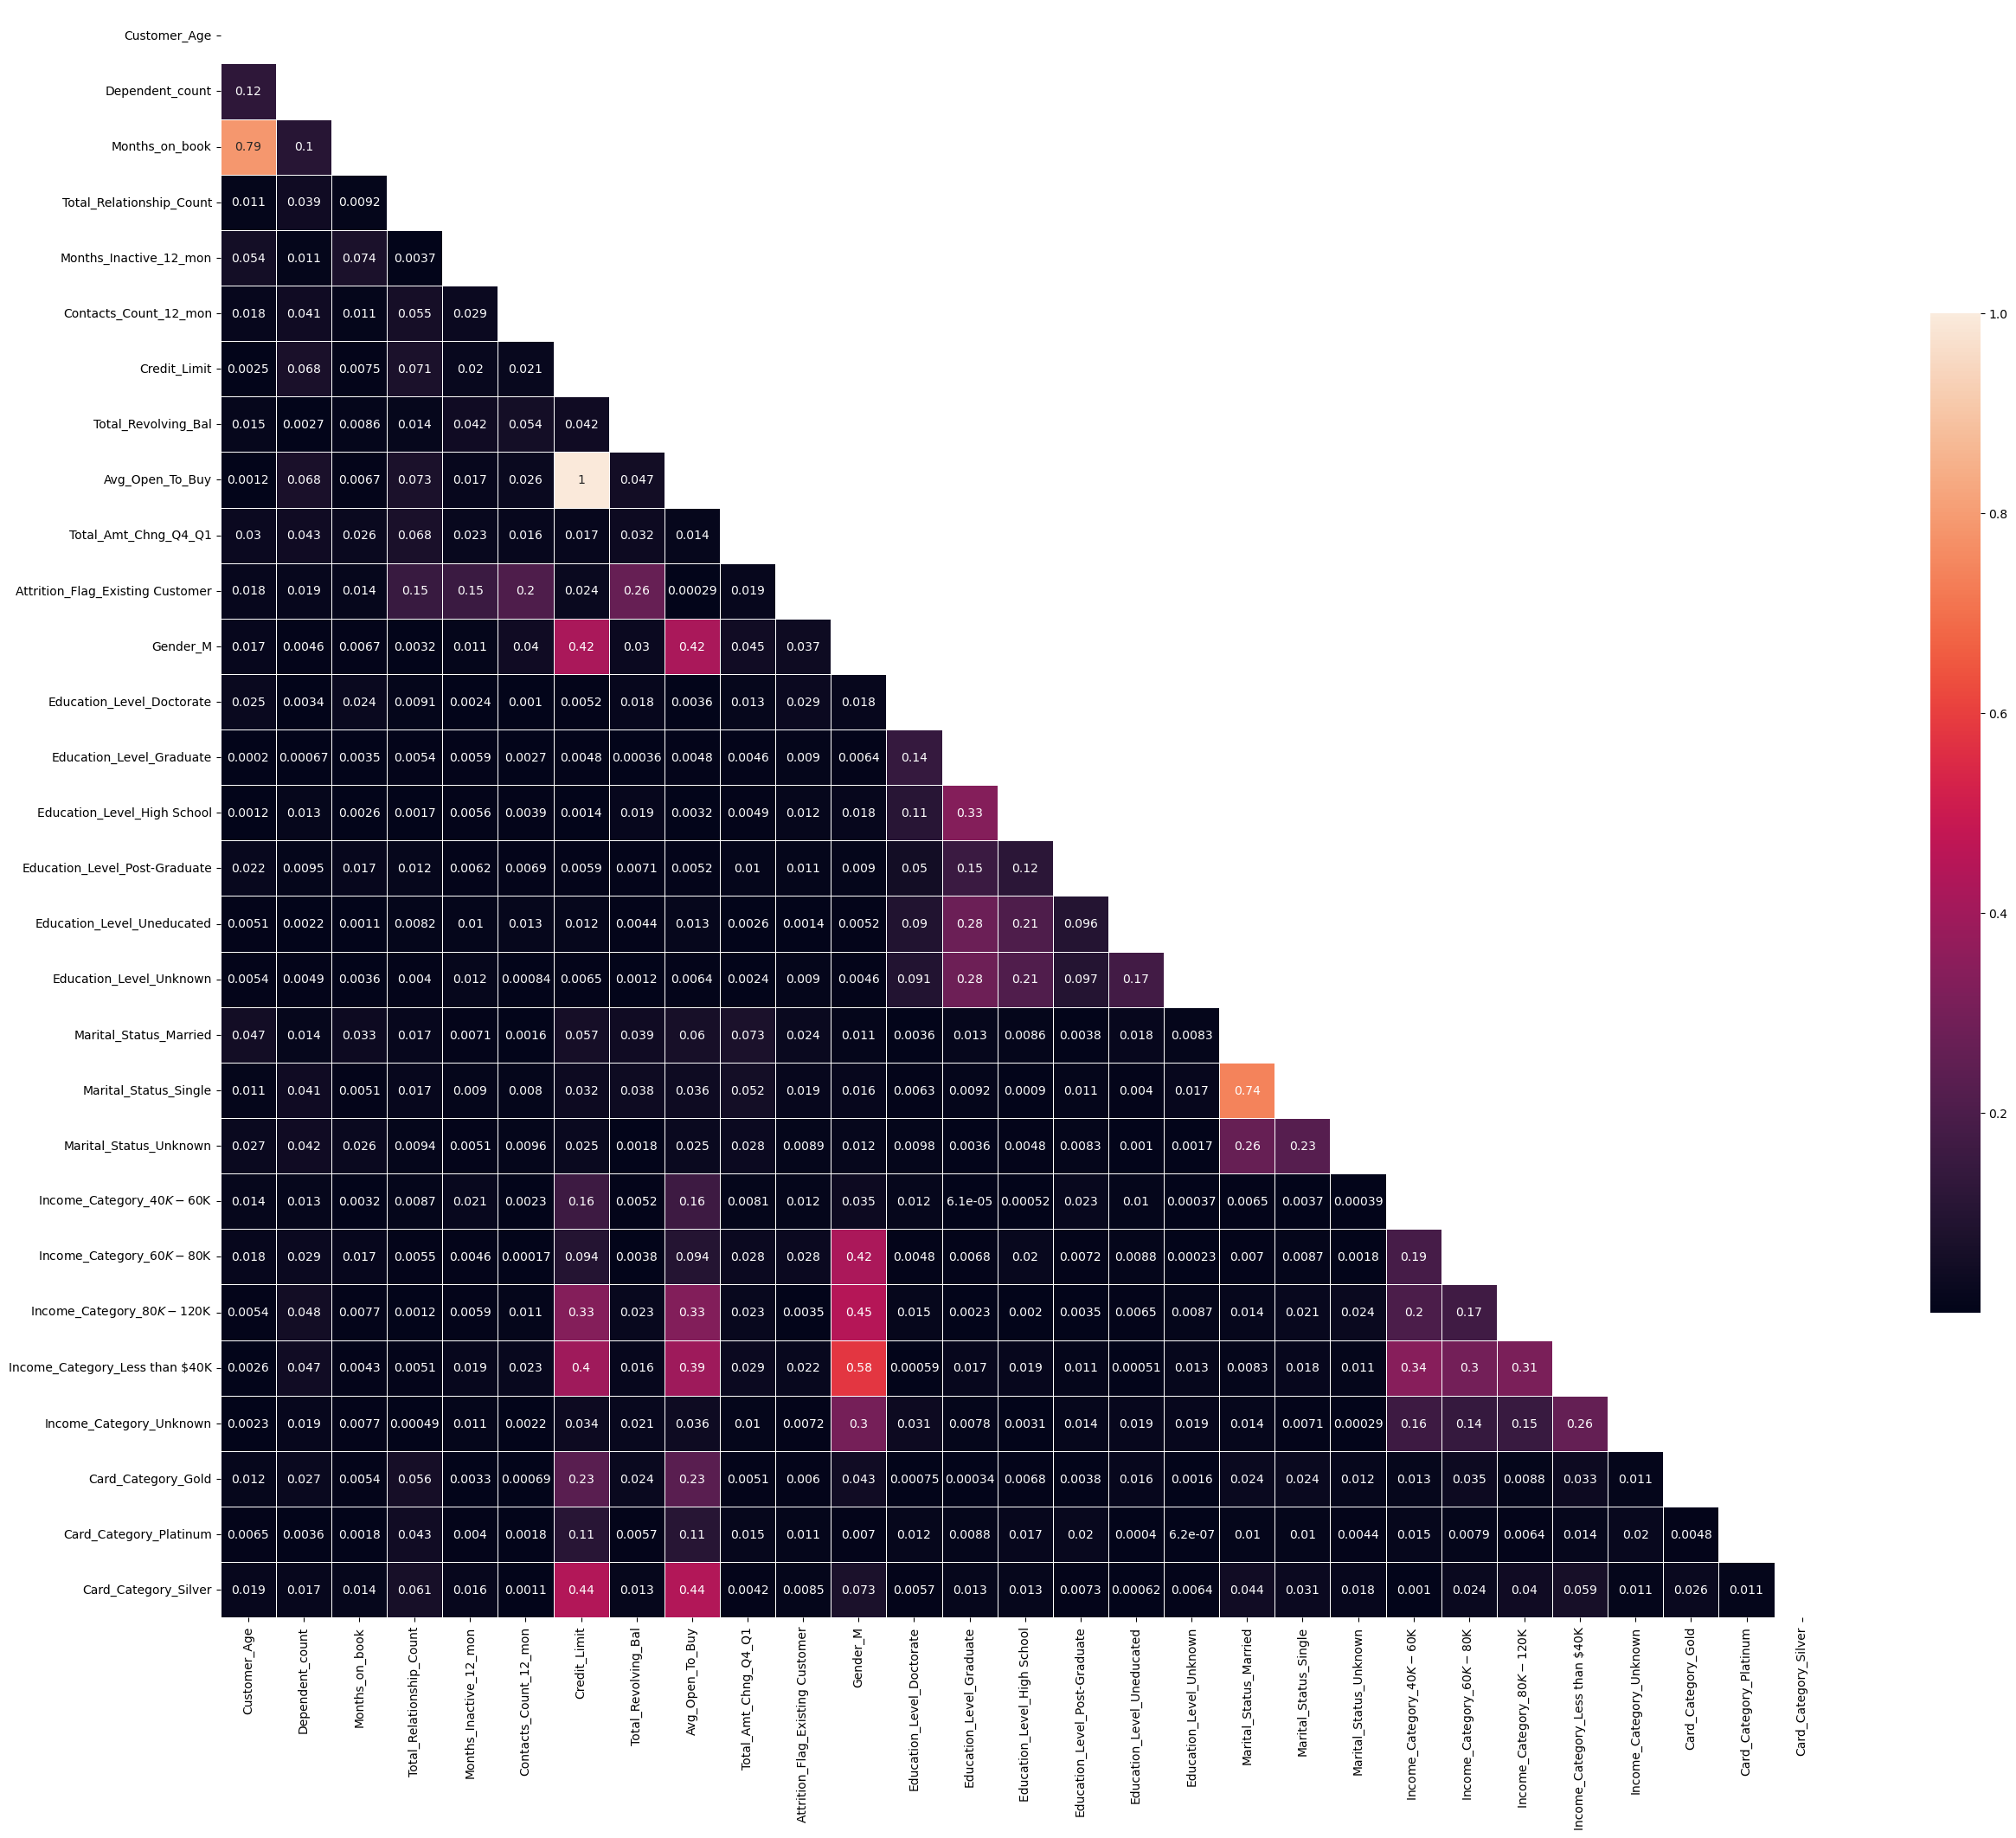

In [64]:
corr=np.abs(df_encoded.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [22]:
features = df.drop(columns = ["Attrition_Flag"])
target = df["Attrition_Flag"]

#### Train Test Split